EDA

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
df = pd.read_csv('../../data/raw/train_dataset.csv')

In [4]:
df.shape

(75757, 64)

In [5]:
df.head()

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,february_max_temp,march_min_temp,march_avg_temp,march_max_temp,april_min_temp,april_avg_temp,april_max_temp,may_min_temp,may_avg_temp,may_max_temp,june_min_temp,june_avg_temp,june_max_temp,july_min_temp,july_avg_temp,july_max_temp,august_min_temp,august_avg_temp,august_max_temp,september_min_temp,september_avg_temp,september_max_temp,october_min_temp,october_avg_temp,october_max_temp,november_min_temp,november_avg_temp,november_max_temp,december_min_temp,december_avg_temp,december_max_temp,cooling_degree_days,heating_degree_days,precipitation_inches,snowfall_inches,snowdepth_inches,avg_temp,days_below_30F,days_below_20F,days_below_10F,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
0,1,State_1,Commercial,Grocery_store_or_food_market,61242.0,1942.0,11.0,2.4,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,1.0,1.0,NaN,248.682615,0
1,1,State_1,Commercial,Warehouse_Distribution_or_Shipping_center,274000.0,1955.0,45.0,1.8,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,NaN,1.0,12.0,26.500150,1
2,1,State_1,Commercial,Retail_Enclosed_mall,280025.0,1951.0,97.0,1.8,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,NaN,1.0,12.0,24.693619,2
3,1,State_1,Commercial,Education_Other_classroom,55325.0,1980.0,46.0,1.8,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,NaN,1.0,12.0,48.406926,3
4,1,State_1,Commercial,Warehouse_Nonrefrigerated,66000.0,1985.0,100.0,2.4,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,1.0,1.0,NaN,3.899395,4


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75757 entries, 0 to 75756
Data columns (total 64 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year_Factor                75757 non-null  int64  
 1   State_Factor               75757 non-null  object 
 2   building_class             75757 non-null  object 
 3   facility_type              75757 non-null  object 
 4   floor_area                 75757 non-null  float64
 5   year_built                 73920 non-null  float64
 6   energy_star_rating         49048 non-null  float64
 7   ELEVATION                  75757 non-null  float64
 8   january_min_temp           75757 non-null  int64  
 9   january_avg_temp           75757 non-null  float64
 10  january_max_temp           75757 non-null  int64  
 11  february_min_temp          75757 non-null  int64  
 12  february_avg_temp          75757 non-null  float64
 13  february_max_temp          75757 non-null  int

In [7]:
object_columns = df.select_dtypes(include=['object'])

In [8]:
float_columns = df.select_dtypes(include=['float64'])

In [9]:
int_columns = df.select_dtypes(include=['int64'])

In [32]:
numerical_columns = df.select_dtypes(exclude=['object'])

In [10]:
df.describe()

,Year_Factor,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,february_max_temp,march_min_temp,march_avg_temp,march_max_temp,april_min_temp,april_avg_temp,april_max_temp,may_min_temp,may_avg_temp,may_max_temp,june_min_temp,june_avg_temp,june_max_temp,july_min_temp,july_avg_temp,july_max_temp,august_min_temp,august_avg_temp,august_max_temp,september_min_temp,september_avg_temp,september_max_temp,october_min_temp,october_avg_temp,october_max_temp,november_min_temp,november_avg_temp,november_max_temp,december_min_temp,december_avg_temp,december_max_temp,cooling_degree_days,heating_degree_days,precipitation_inches,snowfall_inches,snowdepth_inches,avg_temp,days_below_30F,days_below_20F,days_below_10F,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
count,75757.000000,7.575700e+04,73920.000000,49048.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,34675.000000,33946.000000,34675.000000,29961.000000,75757.000000,75757.000000
mean,4.367755,1.659839e+05,1952.306764,61.048605,39.506323,11.432343,34.310468,59.054952,11.720567,35.526837,58.486278,21.606281,44.469292,70.897831,32.037171,53.784863,82.661932,44.706179,63.742547,88.987856,51.131763,71.066384,91.400280,60.571604,76.596879,95.543950,58.515068,75.348749,92.572581,50.791689,69.597545,92.171139,38.210911,58.727038,81.135671,28.630397,48.123133,71.202397,22.736777,41.625569,64.496852,1202.250446,4324.957390,42.430651,29.136379,164.862455,56.176705,48.756511,17.447932,4.886532,0.876764,82.709809,14.058701,0.279539,0.002442,66.552675,62.779974,4.190601,109.142051,82.584693,37878.000000
std,1.471441,2.468758e+05,37.053619,28.663683,60.656596,9.381027,6.996108,5.355458,12.577272,8.866697,8.414611,10.004303,6.657142,7.680982,5.577279,2.500473,4.101028,4.200319,2.792919,2.864669,3.415926,2.861681,3.604068,4.177109,4.090275,4.157118,4.441992,3.818895,4.139685,4.290884,3.603773,5.011708,5.093899,2.641300,5.579513,7.153244,4.094207,4.373374,9.014047,5.869386,6.054104,391.561780,824.366727,10.592205,17.810894,175.275869,2.241940,27.587124,14.469435,7.071221,2.894244,25.282913,10.943996,2.252323,0.142140,131.147834,130.308106,6.458789,50.699751,58.255403,21869.306509
min,1.000000,9.430000e+02,0.000000,0.000000,-6.400000,-19.000000,10.806452,42.000000,-13.000000,13.250000,38.000000,-9.000000,25.854839,53.000000,15.000000,40.280000,62.000000,23.000000,46.950000,64.000000,30.000000,54.100000,67.000000,37.000000,54.822581,65.000000,31.000000,56.693548,66.000000,26.000000,53.600000,64.000000,18.000000,44.693548,59.000000,4.000000,30.766667,53.000000,-16.000000,23.790323,42.000000,0.000000,398.000000,0.000000,0.000000,0.000000,44.512329,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,12.000000,1.001169,0.000000
25%,3.000000,6.237900e+04,1927.000000,40.000000,11.900000,6.000000,29.827586,56.000000,2.000000,31.625000,55.000000,13.000000,38.096774,62.000000,26.000000,52.333333,80.000000,42.000000,62.790323,88.000000,50.000000,70.983333,89.000000,57.000000,76.145161,95.000000,57.000000,74.516129,90.000000,47.000000,68.200000,91.000000,35.000000,58.048387,78.000000,23.000000,45.250000,69.000000,17.000000,38.532258,60.000000,1128.000000,3978

In [11]:
df.duplicated().sum()

0

In [12]:
df.isnull().sum()

Year_Factor                      0
State_Factor                     0
building_class                   0
facility_type                    0
floor_area                       0
year_built                    1837
energy_star_rating           26709
ELEVATION                        0
january_min_temp                 0
january_avg_temp                 0
january_max_temp                 0
february_min_temp                0
february_avg_temp                0
february_max_temp                0
march_min_temp                   0
march_avg_temp                   0
march_max_temp                   0
april_min_temp                   0
april_avg_temp                   0
april_max_temp                   0
may_min_temp                     0
may_avg_temp                     0
may_max_temp                     0
june_min_temp                    0
june_avg_temp                    0
june_max_temp                    0
july_min_temp                    0
july_avg_temp                    0
july_max_temp       

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
<h3 align="left"><font color='#DEB887'>Observation:</font></h3>
    
las columnas de tipo object son: 
    
    State_Factor 
    
    facility_type 
    
    facility_type     
    
NO tienen valores nulos
    
Debe ser codificadas    

In [17]:
object_columns.head()

,State_Factor,building_class,facility_type
0,State_1,Commercial,Grocery_store_or_food_market
1,State_1,Commercial,Warehouse_Distribution_or_Shipping_center
2,State_1,Commercial,Retail_Enclosed_mall
3,State_1,Commercial,Education_Other_classroom
4,State_1,Commercial,Warehouse_Nonrefrigerated


In [28]:
for c in object_columns.columns:
    print(c)
    print(object_columns[c].unique())
    print('  ')

State_Factor
['State_1' 'State_2' 'State_4' 'State_6' 'State_8' 'State_10' 'State_11']
  
building_class
['Commercial' 'Residential']
  
facility_type
['Grocery_store_or_food_market'
 'Warehouse_Distribution_or_Shipping_center' 'Retail_Enclosed_mall'
 'Education_Other_classroom' 'Warehouse_Nonrefrigerated'
 'Warehouse_Selfstorage' 'Office_Uncategorized' 'Data_Center'
 'Commercial_Other' 'Mixed_Use_Predominantly_Commercial'
 'Office_Medical_non_diagnostic' 'Education_College_or_university'
 'Industrial' 'Laboratory' 'Public_Assembly_Entertainment_culture'
 'Retail_Vehicle_dealership_showroom' 'Retail_Uncategorized'
 'Lodging_Hotel' 'Retail_Strip_shopping_mall' 'Education_Uncategorized'
 'Health_Care_Inpatient' 'Public_Assembly_Drama_theater'
 'Public_Assembly_Social_meeting' 'Religious_worship'
 'Mixed_Use_Commercial_and_Residential' 'Office_Bank_or_other_financial'
 'Parking_Garage' 'Commercial_Unknown'
 'Service_Vehicle_service_repair_shop' 'Service_Drycleaning_or_Laundry'
 'Public_As

In [29]:
for c in object_columns.columns:
    print(object_columns[c].value_counts())
    print('    ')

State_6     50840
State_11     6412
State_1      5618
State_2      4871
State_4      4300
State_8      3701
State_10       15
Name: State_Factor, dtype: int64
    
Residential    43558
Commercial     32199
Name: building_class, dtype: int64
    
Multifamily_Uncategorized                    39455
Office_Uncategorized                         12512
Education_Other_classroom                     3860
Lodging_Hotel                                 2098
2to4_Unit_Building                            1893
Commercial_Other                              1744
5plus_Unit_Building                           1273
Warehouse_Nonrefrigerated                     1255
Retail_Uncategorized                          1130
Education_College_or_university               1056
Nursing_Home                                   772
Education_Uncategorized                        709
Mixed_Use_Commercial_and_Residential           672
Lodging_Dormitory_or_fraternity_sorority       669
Warehouse_Distribution_or_Shipping_cente

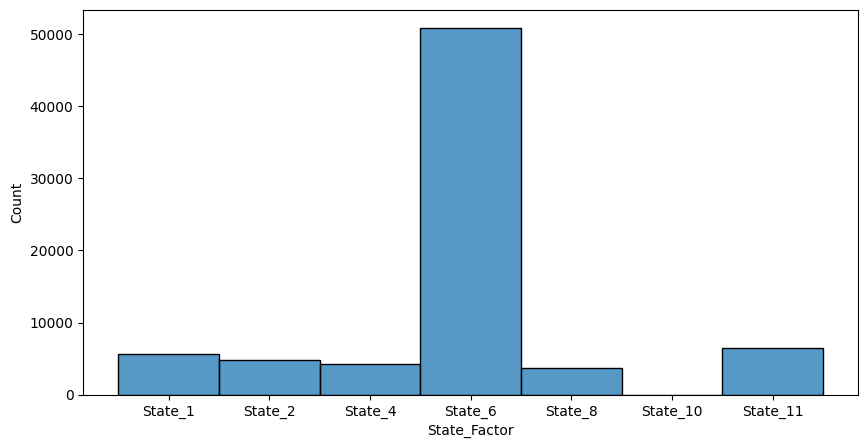

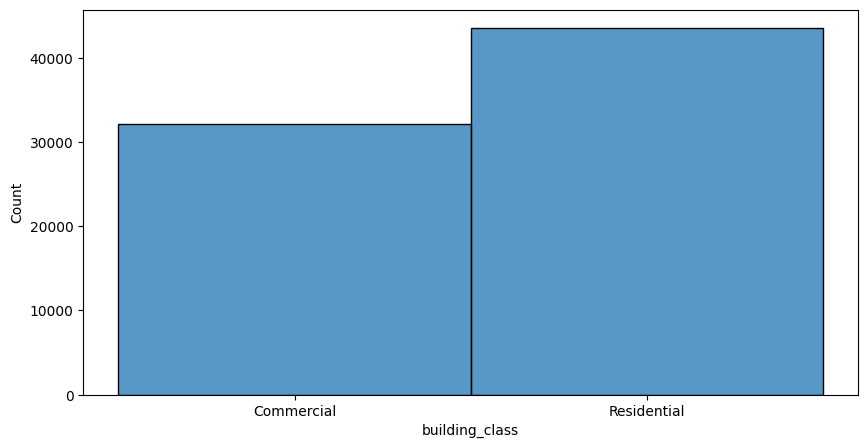

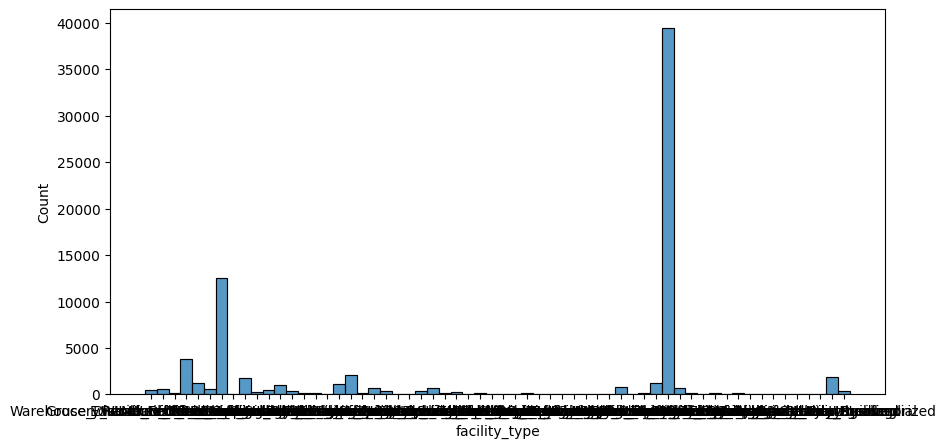

In [30]:
for c in object_columns.columns:
    plt.figure(figsize=(10,5))
    sns.histplot(object_columns[c])
    plt.show()   

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
<h3 align="left"><font color='#DEB887'>Observation:</font></h3>
    
Las columnas numericas  

    
    year_built                    1837 NULOS

    energy_star_rating           26709 NULOS
    
    direction_max_wind_speed     41082 NULOS

    direction_peak_wind_speed    41811 NULOS

    max_wind_speed               41082 NULOS

    days_with_fog                45796 NULOS
    
    

In [33]:
numerical_columns.head()

,Year_Factor,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,february_max_temp,march_min_temp,march_avg_temp,march_max_temp,april_min_temp,april_avg_temp,april_max_temp,may_min_temp,may_avg_temp,may_max_temp,june_min_temp,june_avg_temp,june_max_temp,july_min_temp,july_avg_temp,july_max_temp,august_min_temp,august_avg_temp,august_max_temp,september_min_temp,september_avg_temp,september_max_temp,october_min_temp,october_avg_temp,october_max_temp,november_min_temp,november_avg_temp,november_max_temp,december_min_temp,december_avg_temp,december_max_temp,cooling_degree_days,heating_degree_days,precipitation_inches,snowfall_inches,snowdepth_inches,avg_temp,days_below_30F,days_below_20F,days_below_10F,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
0,1,61242.0,1942.0,11.0,2.4,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,1.0,1.0,NaN,248.682615,0
1,1,274000.0,1955.0,45.0,1.8,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,NaN,1.0,12.0,26.500150,1
2,1,280025.0,1951.0,97.0,1.8,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,NaN,1.0,12.0,24.693619,2
3,1,55325.0,1980.0,46.0,1.8,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,NaN,1.0,12.0,48.406926,3
4,1,66000.0,1985.0,100.0,2.4,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,1.0,1.0,NaN,3.899395,4


In [34]:
numerical_columns.isnull().sum()

Year_Factor                      0
floor_area                       0
year_built                    1837
energy_star_rating           26709
ELEVATION                        0
january_min_temp                 0
january_avg_temp                 0
january_max_temp                 0
february_min_temp                0
february_avg_temp                0
february_max_temp                0
march_min_temp                   0
march_avg_temp                   0
march_max_temp                   0
april_min_temp                   0
april_avg_temp                   0
april_max_temp                   0
may_min_temp                     0
may_avg_temp                     0
may_max_temp                     0
june_min_temp                    0
june_avg_temp                    0
june_max_temp                    0
july_min_temp                    0
july_avg_temp                    0
july_max_temp                    0
august_min_temp                  0
august_avg_temp                  0
august_max_temp     

In [36]:
numerical_columns.duplicated().sum()

0

In [43]:
for X in numerical_columns:
    aux = sorted(numerical_columns[X])
    Q1 = numerical_columns[X].quantile(0.25)
    Q3 = numerical_columns[X].quantile(0.75)
    IQR = Q3 - Q1
    INF = Q1 - (1.5*IQR)
    SUP = Q3 + (1.5*IQR)
    print(X + ' - el valor de IQR es: ' + str(IQR) + ' limite inferior: ' + str(INF) + ' limite superior: ' + str(SUP))

Year_Factor - el valor de IQR es: 3.0 limite inferior: -1.5 limite superior: 10.5
floor_area - el valor de IQR es: 103621.0 limite inferior: -93052.5 limite superior: 321431.5
year_built - el valor de IQR es: 50.0 limite inferior: 1852.0 limite superior: 2052.0
energy_star_rating - el valor de IQR es: 45.0 limite inferior: -27.5 limite superior: 152.5
ELEVATION - el valor de IQR es: 30.800000000000004 limite inferior: -34.300000000000004 limite superior: 88.9
january_min_temp - el valor de IQR es: 7.0 limite inferior: -4.5 limite superior: 23.5
january_avg_temp - el valor de IQR es: 7.494994439999999 limite inferior: 18.58509455 limite superior: 48.56507231
january_max_temp - el valor de IQR es: 6.0 limite inferior: 47.0 limite superior: 71.0
february_min_temp - el valor de IQR es: 18.0 limite inferior: -25.0 limite superior: 47.0
february_avg_temp - el valor de IQR es: 9.254310340000004 limite inferior: 17.743534489999995 limite superior: 54.76077585000001
february_max_temp - el valor

In [ ]:
columnas_numericas = ['Year_Factor','floor_area','year_built','energy_star_rating','ELEVATION','january_min_temp',
                      'january_avg_temp','january_max_temp','february_min_temp','february_avg_temp','february_max_temp',                     
                        'march_min_temp','march_avg_temp','march_max_temp','april_min_temp','april_avg_temp','april_max_temp',
                        'may_min_temp','may_avg_temp','may_max_temp','june_min_temp','june_avg_temp','june_max_temp','july_min_temp',
                        'july_avg_temp','july_max_temp','august_min_temp','august_avg_temp','august_max_temp','september_min_temp',
                    'september_avg_temp','september_max_temp','october_min_temp','october_avg_temp','october_max_temp',
                        'november_min_temp','november_avg_temp','november_max_temp','december_min_temp','december_avg_temp',
                        'december_max_temp','cooling_degree_days','heating_degree_days','precipitation_inches',
                        'snowfall_inches','snowdepth_inches','avg_temp','days_below_30F','days_below_20F','days_below_10F',
                        'days_below_0F','days_above_80F','days_above_90F','days_above_100F',
                        'days_above_110F','direction_max_wind_speed','direction_peak_wind_speed','max_wind_speed',
                      'days_with_fog','site_eui','id']

columnas_categoricas = ['State_Factor','building_class','facility_type']

target=['site_eui']

temp_df = df[['january_min_temp',
                      'january_avg_temp','january_max_temp','february_min_temp','february_avg_temp','february_max_temp',                     
                        'march_min_temp','march_avg_temp','march_max_temp','april_min_temp','april_avg_temp','april_max_temp',
                        'may_min_temp','may_avg_temp','may_max_temp','june_min_temp','june_avg_temp','june_max_temp','july_min_temp',
                        'july_avg_temp','july_max_temp','august_min_temp','august_avg_temp','august_max_temp','september_min_temp',
                    'september_avg_temp','september_max_temp','october_min_temp','october_avg_temp','october_max_temp',
                        'november_min_temp','november_avg_temp','november_max_temp','december_min_temp','december_avg_temp',
                        'december_max_temp']]

for X in temp_df:
    plt.subplots(figsize=(30, 5))
    plt.boxplot(temp_df[X], vert=False)
    plt.ylabel(X)
    plt.show()
    


In [ ]:
df2 = df[['ELEVATION','cooling_degree_days','heating_degree_days','precipitation_inches',
                        'snowfall_inches','snowdepth_inches','avg_temp','days_below_30F','days_below_20F','days_below_10F',
                        'days_below_0F','days_above_80F','days_above_90F','days_above_100F',
                        'days_above_110F','direction_max_wind_speed','direction_peak_wind_speed','max_wind_speed',
                      'days_with_fog','site_eui','id']]


for X in df2:
    plt.subplots(figsize=(30, 10))
    plt.boxplot(df2[X], vert=False)
    plt.ylabel(X)
    plt.show()

Aqui vamos a revisar el tema de multicolinearidad

In [ ]:
plt.figure(figsize=(40,30))
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.heatmap(df.corr(), annot=True, mask=mask, vmin=-1, vmax=1)
plt.title('Correlation Coefficient Of Predictors')
plt.show()

El heatmap superior permite conocer las features altamente correlacionadas para luego verificar su multicolineridad

Veamos el skew de los datos

In [ ]:
num_feats = df.dtypes[df.dtypes!='object'].index
skew_feats = df[num_feats].skew().sort_values(ascending= True)
skenes = pd.DataFrame({'skew':skew_feats})

In [ ]:
print(skenes)